In [1]:
%load_ext autoreload
%autoreload 2

from stanley_appex.estimation import *
from stanley_appex.plotting import *
from stanley_appex.utils import *
from stanley_appex.generate_data import *
import numpy as np
import matplotlib.pyplot as plt

15000
Final number of trajectories: 6


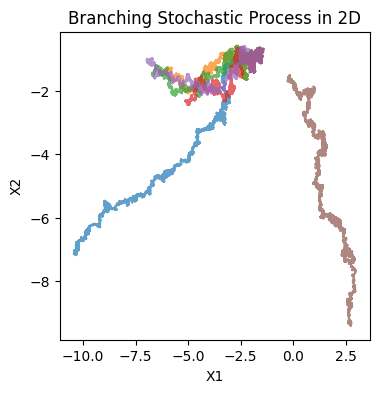

In [2]:
d = 2
A = np.array([[1, 0.1], 
              [-0.1, 1]])

# A = np.array([1.0])

G = np.array([[1, 0.0], 
              [0.0, 1]])

G = np.eye(d)
# G = np.array([1.0])

H = G@G.T

growth_rate = 2
growth_vector = np.array([0.1, 0.1])
# lambda_func = lambda X: 1.3 * np.exp(-0.01*np.linalg.norm(X))  # Decaying branching rate
lambda_func = lambda X: np.exp(np.dot(growth_vector, X)) # 1.0 # 1.0 # Constant branching rate

N_init = 2
X0 = np.random.multivariate_normal(np.zeros(d), np.diag(np.ones(d)), N_init) # np.random.normal(0, 1, (N_init, A.shape[1]))

Nt = 15000
process = BranchingStochasticProcess(A, G, dt=0.0001, Nt=Nt, N_traj=N_init)

# process.simulate(X0, growth_rate=growth_rate)
process.simulate(X0, growth_rate=lambda_func)

print("Final number of trajectories:", process.N_traj)

process.plot_trajectories(downsample=1)


In [3]:
down_sample_rate = 1
ts_data, xs_data = process.get_marginal_data()
dt = process.dt

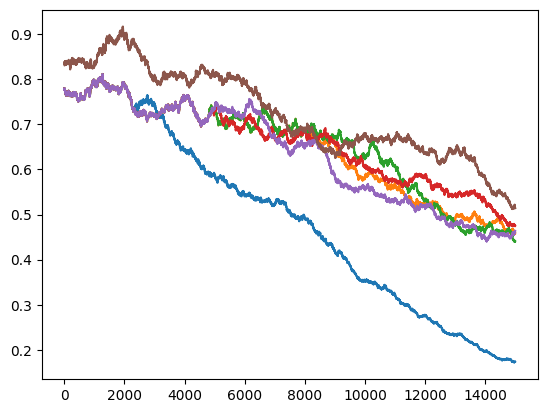

In [ ]:
plt.plot(np.apply_along_axis(lambda_func, 2, process.trajectories).T)

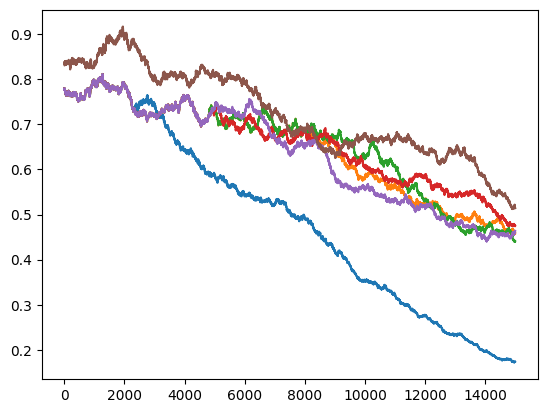

In [20]:
trajectory_growth_rate = np.apply_along_axis(lambda_func, 2, process.trajectories)
plt.plot(trajectory_growth_rate.T);

(array([1., 0., 0., 0., 2., 0., 0., 0., 0., 1.]),
 array([2318. , 2890.1, 3462.2, 4034.3, 4606.4, 5178.5, 5750.6, 6322.7,
        6894.8, 7466.9, 8039. ]),
 <BarContainer object of 10 artists>)

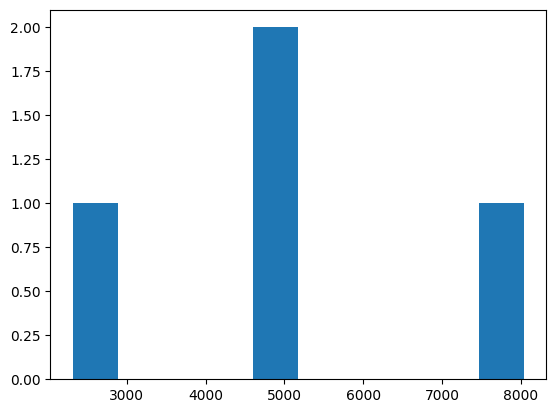

In [24]:
plt.hist(process.get_branch_times())

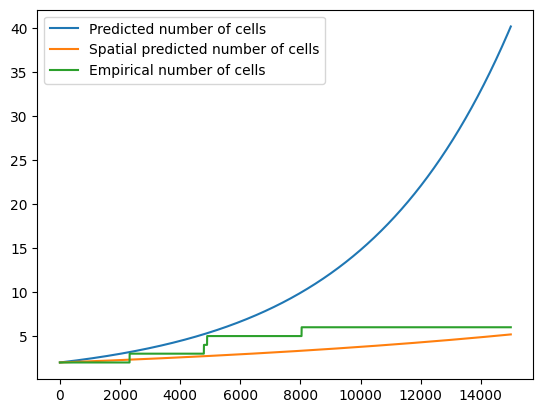

In [ ]:
num_cells = [len(xs_data[t]) for t in range(Nt)]
plt.plot(num_cells[0]*np.exp(growth_rate*ts_data), label="Predicted number of cells")
plt.plot(num_cells[0]*np.exp(trajectory_growth_rate.mean()*ts_data), label="Average predicted number of cells")
plt.plot(num_cells, label="Empirical number of cells")
plt.legend()

In [ ]:
d = 2
A = np.array([[1, 0.1], 
              [-0.1, 1]])

# A = np.array([1.0])

G = np.array([[1, 0.0], 
              [0.0, 1]])

G = np.eye(d)
# G = np.array([1.0])

H = G@G.T

growth_rate = 2
# lambda_func = lambda X: 1.3 * np.exp(-0.01*np.linalg.norm(X))  # Decaying branching rate
# lambda_func = lambda X: growth_rate # 1.0 # 1.0 # Constant branching rate

N_init = 2
X0 = np.random.multivariate_normal(np.zeros(d), np.diag(np.ones(d)), N_init) # np.random.normal(0, 1, (N_init, A.shape[1]))
# X0 = np.random.normal(0, 1, (N_init))
Nt = 15000
process = BranchingStochasticProcess(A, G, dt=0.0001, Nt=Nt, N_traj=N_init)
# process = BranchingStochasticProcess(A, G, X0, no_branch_lambda_func, dt=0.0001, T=2.0, N_traj=10)
process.simulate(X0, growth_rate=growth_rate)
# process.simulate_track(X0, growth_rate=growth_rate)
print("Final number of trajectories:", process.N_traj)
# print(process.lineage_tree)
process.plot_trajectories(downsample=1)

# process.save_file(f'data/trajectories.h5', downsample_rate=500)